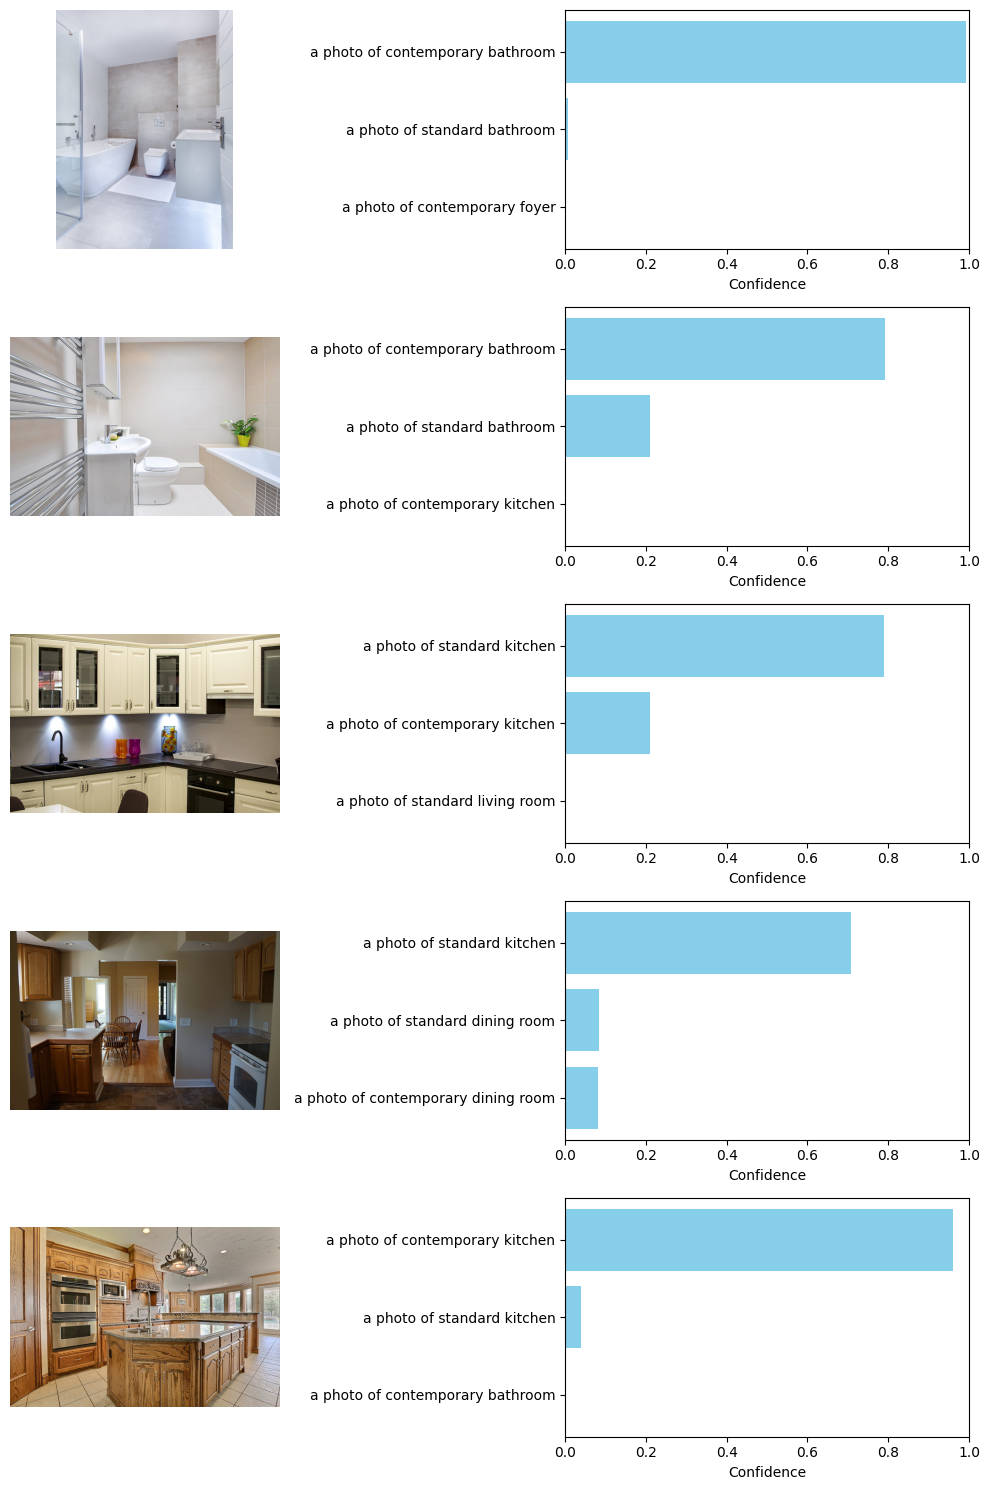

In [6]:
from transformers import pipeline
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Initialize the HuggingFace zero-shot classification pipeline with the given model
classifier = pipeline("zero-shot-image-classification", model="strollingorange/roomLuxuryAnnotater", device="cuda")

# Define the candidate labels
candidate_labels = [
    "a photo of standard bathroom",
    "a photo of contemporary bathroom",
    "a photo of standard kitchen",
    "a photo of contemporary kitchen",
    "a photo of standard foyer",
    "a photo of standard living room",
    "a photo of standard dining room",
    "a photo of contemporary foyer",
    "a photo of contemporary living room",
    "a photo of contemporary dining room"
]

# URLs of images to classify
image_urls = [
    "https://i1.pickpik.com/photos/354/667/788/modern-minimalist-bathroom-interior-toilet-shower-preview.jpg",
    "https://i1.pickpik.com/photos/910/213/123/bathroom-luxury-luxury-bathroom-sink-preview.jpg",
    "https://i1.pickpik.com/photos/291/24/837/furniture-kitchen-luxury-comfort-preview.jpg",
    "https://i2.pickpik.com/photos/180/1019/618/kitchen-room-table-apartment-preview.jpg",
    "https://i2.pickpik.com/photos/708/4/888/kitchen-luxury-room-interior-design-preview.jpg"
]

# Prepare the plot with two subplots (one for image, one for bar chart)
fig, axes = plt.subplots(len(image_urls), 2, figsize=(10, 15), gridspec_kw={'width_ratios': [1, 1.5]})

# Iterate over each image and perform classification
for i, image_url in enumerate(image_urls):
    # Download the image
    image = Image.open(requests.get(image_url, stream=True).raw)

    # Perform zero-shot classification on the image
    result = classifier(image, candidate_labels=candidate_labels)

    # Sort the results by confidence score
    sorted_results = sorted(result, key=lambda x: x['score'], reverse=True)[:3]

    # Get the top 3 predictions and their confidence scores
    top_labels = [r['label'] for r in sorted_results]
    top_scores = [r['score'] for r in sorted_results]

    # Display the image on the left side
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')  # Hide the axis

    # Create a horizontal bar plot on the right side
    y_pos = np.arange(len(top_labels))
    axes[i, 1].barh(y_pos, top_scores, align='center', color='skyblue')
    axes[i, 1].set_yticks(y_pos)
    axes[i, 1].set_yticklabels(top_labels)
    axes[i, 1].invert_yaxis()  # Invert y-axis to display the highest score on top
    axes[i, 1].set_xlim(0, 1)  # Confidence scores range between 0 and 1
    axes[i, 1].set_xlabel('Confidence')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()